# ToBig's 11th W04 Machine-Learning Performance Tuning
## Assignment : Imbalanced Dataset Handling using Cloud Service
### 11기 김대웅

## 0. Data Load

In [ ]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 13.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
sns.set()

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 공유폴더 내 파일 오른쪽 클릭 > 공유가능한 링크 복사 > id와 파일명을 아래처럼 적어줌
# 복사된 주소 : https://drive.google.com/open?id=1F67mZanxKNSI8RCmgPAFcTlMoPZS7ulX

In [ ]:
download = drive.CreateFile({"id": "1F67mZanxKNSI8RCmgPAFcTlMoPZS7ulX"}) #이부분 수정하면 됩니당
download.GetContentFile("wine2.csv")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("wine2.csv")

In [ ]:
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
X, y = df.iloc[:,1:], df.iloc[:,0]

## cf. Imbalanced Data Handling Process


## 1.1. Under Sampling
1. Random - 적은 Class를 기준으로 Random하게 선택
2. Nearmiss - Heuristics based on NN algorithm
3. AllKNN - 자기 Class 내에서 가장 가까운 데이터만 남김
4. Instance Hardness Threshold : 모델을 사용해서 Under Sampling
   해당 모델을 통해 Class로 뱉어내는데 사용하는 확률을 기반으로 Sample을 선택.

## 1.2. Over Sampling
 1. Random - 현재 가능한 데이터에서 일부를 복사
 2. SMOTE - 실제 데이터의 거리 사이에 데이터를 만들어내자

In [ ]:
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
Counter(df.Wine)

Counter({1: 59, 2: 71, 3: 22})

In [ ]:
%matplotlib inline

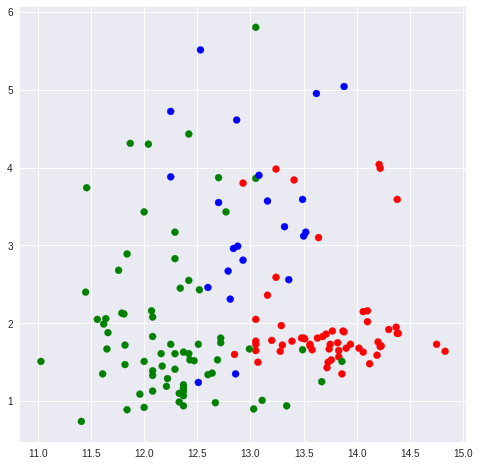

In [ ]:
colors = ["red", "green", "blue"]
fig = plt.figure(figsize=(8,8))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=y,
            cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

## [Imbalanced Data Handling Process]
- A. 전체 Data set에서 Tset set, Dev set으로 Stratified Resampling
- B. Dev set으로 (1) Under Sampling or (2) Over Sampling
- C. Model Training
- D. Test set으로 검증하기

## A. 전체 Data set에서 Tset set, Dev set으로 Stratified Resampling

In [ ]:
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2,
                                                random_state = 42, stratify=y)

In [ ]:
Counter(y_dev), Counter(y_test)

(Counter({1: 47, 2: 57, 3: 17}), Counter({1: 12, 2: 14, 3: 5}))

In [ ]:
# Train Set의 비율
np.array(list(Counter(y_dev).values())) / len(y_dev)


array([0.38842975, 0.14049587, 0.47107438])

In [ ]:
# Test Set의 비율
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.38709677, 0.16129032, 0.4516129 ])

In [ ]:
# 전체 Data Set의 비율
np.array(list(Counter(y).values())) / len(y)

array([0.38815789, 0.46710526, 0.14473684])

In [ ]:
# Build Model for Dev dataset with under sampling
Counter(y)

Counter({1: 59, 2: 71, 3: 22})

## B. Dev set으로 Over Sampling

### B.1.) Over Sampling with Random

In [ ]:
from imblearn.over_sampling import RandomOverSampler

Counter(y_dev)

Counter({1: 47, 2: 57, 3: 17})

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_dev, y_dev)

## C & D. Model Traing & 검증
- Random Over Sampling Set으로 학습시킨 모델과, Dev Set으로 학습시킨 모델의 Test Set에 대한 분류 성능 비교
- 분류 모델은 아래 네 종류를 사용함
  0. Logistic Regression
  1. KNN
  2. Naive Bayes
  3. SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
def giv_me_rslt(X_res, y_res, method=None):
    '''
    method = string type, for decoration
    '''
    c_models_nm = ["LR", "KNN", "SVC", "NB"]
    results = {}
    lr = LogisticRegression()
    knn = KNeighborsClassifier()
    svc = Pipeline([("scaler", StandardScaler()), ("classifier", SVC())])
    nb = GaussianNB()

    c_models = [lr, knn, svc, nb]
    colors = ['red', 'green', 'blue']

    for i in range(len(c_models)):
        c_models[i].fit(X_res, y_res)
        y_pred = c_models[i].predict(X_test)
        print("Model Trained by Random Over Sampled Set")
        print("Model : {0}".format(c_models_nm[i]))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("F1 score:", f1_score(y_test, y_pred, average="weighted"))
        print(classification_report(y_test, y_pred, target_names=["1", "2", "3"]))
        Model = c_models[i]
        results[c_models_nm[i]+"_"+method] = [Model, y_pred, f1_score(y_test, y_pred, average="weighted")]

        c_models[i].fit(X_dev, y_dev)
        y_pred2 = c_models[i].predict(X_test)
        print("\nModel Trained by Dev Set")
        print("Model : {0}".format(c_models_nm[i]))
        print("Accuracy :", accuracy_score(y_test, y_pred2))
        print("F1 score:", f1_score(y_test, y_pred2, average="weighted"))
        print(classification_report(y_test, y_pred2, target_names=["1", "2", "3"]))
        print("====================================================")

        Model2 = c_models[i]
        results[c_models_nm[i]+"_DevSet"] = [Model2, y_pred2, f1_score(y_test, y_pred2, average="weighted")]

    plt.close("all")
    fig = plt.figure(figsize=(15,7),)

    from mpl_toolkits.axes_grid1 import Grid
    grid = Grid(fig, rect=111, nrows_ncols = (2, 4),
               axes_pad=0.25, label_mode="L")

    for i, ax in enumerate(grid):
        if i < 4:
            ax.scatter(x=X_test.iloc[:,1], y=X_test.iloc[:,2], c=results[list(results.keys())[i*2]][1],
                       cmap = matplotlib.colors.ListedColormap(colors))
            ax.set_xlabel("Alchol", fontsize=15)
            ax.set_ylabel("Malic acid", fontsize=15)
            ax.set_title(list(results.keys())[i*2], fontsize=18)
        else:
            ax.scatter(x=X_test.iloc[:,1], y=X_test.iloc[:,2], c=results[list(results.keys())[i-(7%i)]][1],
                       cmap = matplotlib.colors.ListedColormap(colors))
            ax.set_xlabel("Alchol", fontsize=15)
            ax.set_ylabel("Malic acid", fontsize=15)
            ax.set_title(list(results.keys())[i-(7%i)], fontsize=18)

    plt.tight_layout(rect=(0.5, 0.5, 0.5, 0.5), pad = 10, h_pad=10, w_pad=10)
    fig.suptitle("Compare {0} with Dev set".format(method), fontsize="25")


    Resampled_Model = [] ; Dev_Model = []
    Resampled_F1_Score = [] ; Dev_F1_Score = []

    for model_name, F1_score in zip(list(results.keys()), [ i[1][2] for i in results.items()]):
        if method in model_name:
            Resampled_Model.append(model_name.split("_")[0])
            Resampled_F1_Score.append(F1_score)
        else:
            Dev_Model.append(model_name.split("_")[0])
            Dev_F1_Score.append(F1_score)

    df = pd.DataFrame({"Resampled_Model": Resampled_Model, "Resampled_F1_Score" : Resampled_F1_Score, "Dev_Model" : Dev_Model, "Dev_F1_Score" : Dev_F1_Score})
    return df

Model Trained by Random Over Sampled Set
Model : LR
Accuracy : 0.967741935483871
F1 score: 0.9665059943146707
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.98      0.93      0.95        31
weighted avg       0.97      0.97      0.97        31


Model Trained by Dev Set
Model : LR
Accuracy : 0.967741935483871
F1 score: 0.9665059943146707
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.98      0.93      0.95        31
weighted avg       0.97      0.97      0.97        31

Model Trained by Random Over Samp

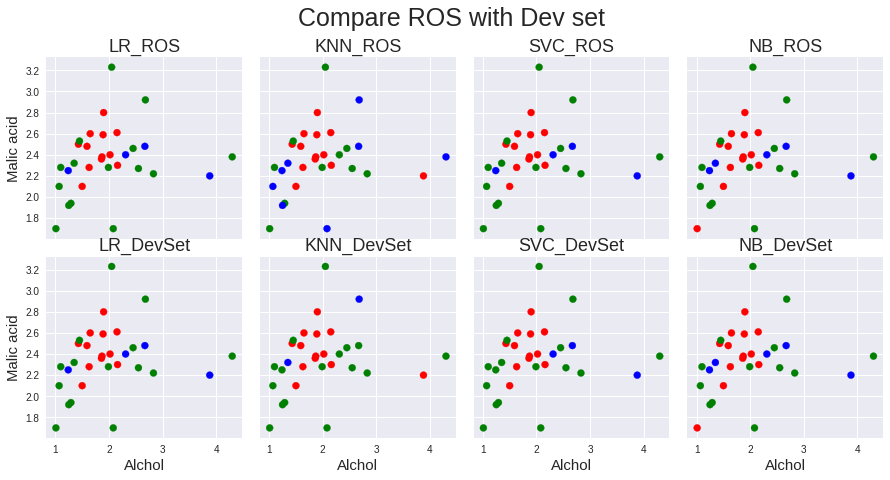

In [ ]:
resample_random = giv_me_rslt(X_resampled, y_resampled, "ROS")

   Dev_F1_Score Dev_Model  Resampled_F1_Score Resampled_Model
0      0.966506        LR            0.966506              LR
1      0.809094       KNN            0.784764             KNN
2      0.929570       SVC            0.966506             SVC
3      0.967790        NB            0.967790              NB


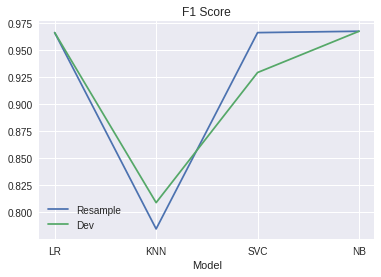

In [ ]:
# F1 score 비교
print(resample_random)
plt.close("all")
plt.plot(resample_random.Resampled_Model, resample_random.Resampled_F1_Score,
         resample_random.Dev_Model, resample_random.Dev_F1_Score)
plt.title("F1 Score")
plt.xlabel("Model")
plt.legend({"Resample":resample_random.Resampled_Model,
            "Dev":resample_random.Dev_Model})
plt.show()


분류모델의 성능을 F1-score로 측정한 결과, Naive Bayes Model을 제외하고
Dev Set 전체를 사용한 것과 Random Over Resample Set을 사용한 것의 차이가 존재하였다.

하지만 이 차이는 모델에 따라 다르게 나타나 특정 Sampling 방법이 더 좋은 성능을 보여준다고는 할 수 없다.

모델의 성능은 전반적으로 KNN < SVC < LR < NB 순으로 나타났다.

특히 KNN은 전반적으로 낮은 성능을 보여주었고 Dev Set에서 약간 더 높은 성능을 보여주었다.
SVC는 Resample Set에서 더 높은 성능을 보여주었으며 이는 Naive Bayes Model의 성능과 동일하였다.
LR과 NB는 두 Set 간의 차이가 없이 동일한 성능을 보여주며, NB는 모든 Model 중 가장 높은 성능을 보여주었다.

### B.2.) Over Sampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smothe = SMOTE()
X_resampled_smothe, y_resampled_smothe = smothe.fit_sample(X_dev, y_dev)

## C & D. Model Traing & 검증
- Random Over Sampling Set으로 학습시킨 모델과, Dev Set으로 학습시킨 모델의 Test Set에 대한 분류 성능 비교
- 분류 모델은 아래 네 종류를 사용함
  0. Logistic Regression
  1. KNN
  2. Naive Bayes
  3. SVM

Model Trained by Random Over Sampled Set
Model : LR
Accuracy : 0.967741935483871
F1 score: 0.9665059943146707
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.98      0.93      0.95        31
weighted avg       0.97      0.97      0.97        31


Model Trained by Dev Set
Model : LR
Accuracy : 0.967741935483871
F1 score: 0.9665059943146707
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.98      0.93      0.95        31
weighted avg       0.97      0.97      0.97        31

Model Trained by Random Over Samp

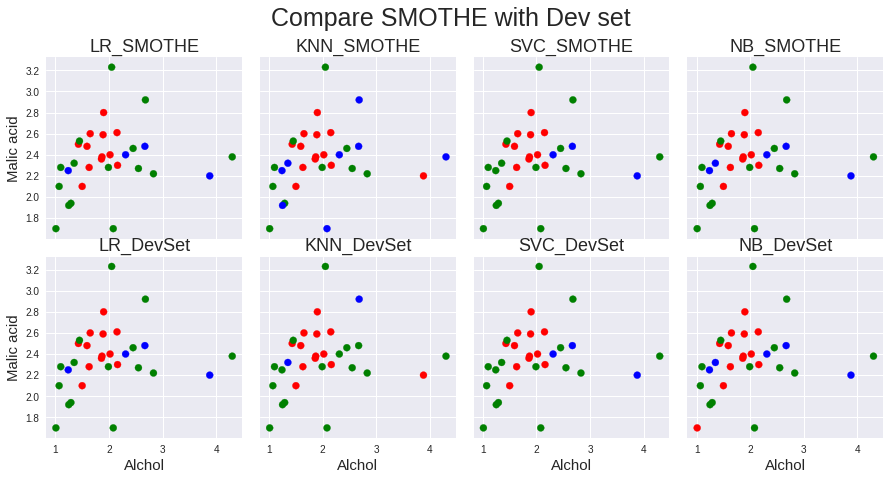

In [ ]:
df_smothe = giv_me_rslt(X_resampled_smothe, y_resampled_smothe, "SMOTHE")

   Dev_F1_Score Dev_Model  Resampled_F1_Score Resampled_Model
0      0.966506        LR            0.966506              LR
1      0.809094       KNN            0.847213             KNN
2      0.929570       SVC            0.929570             SVC
3      0.967790        NB            1.000000              NB


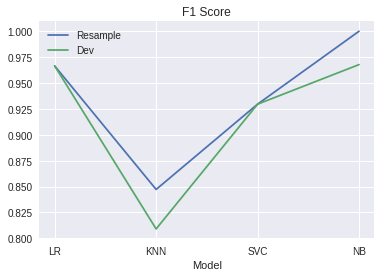

In [ ]:
# F1 score 비교
print(df_smothe)
plt.close("all")
plt.plot(df_smothe.Resampled_Model, df_smothe.Resampled_F1_Score,
         df_smothe.Dev_Model, df_smothe.Dev_F1_Score)
plt.title("F1 Score")
plt.xlabel("Model")
plt.legend({"Resample":df_smothe.Resampled_Model,
            "Dev":df_smothe.Dev_Model})
plt.show()


분류모델의 성능을 F1-score로 측정한 결과, LR과 SVC Model을 제외하고
Dev Set 전체를 사용한 것과 SMOTHE Resample Set을 사용한 것의 차이가 존재했다.

모델의 성능은 이전의 경우와 동일하게 KNN < SVC < LR < NB 순으로 나타났다.


특히 KNN은 전반적으로 낮은 성능을 보여주었고 Resample Set이 약간 더 높은 성능을 보이지만 둘 간의 큰 차이는 없었다.
LR과 SVC는 두 Set 간의 차이가 없이 동일한 성능을 보여주었으며,
NB모든 Model 중 가장 높은 성능을 보여주었다.